In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv("D:\Lectures\England\DAV\Report\dataset\call_log\call_log_u59.csv")

#table[['timestamp']].head()
#for row in table.iterrows():
#    table['timestamp'] = table['timestamp'].replace(row[1][2],datetime.fromtimestamp(row[1][2]))
    
  

In [54]:
table.head()

,id,device,timestamp,CALLS__id,CALLS_date,CALLS_duration,CALLS_name,CALLS_number,CALLS_numberlabel,CALLS_numbertype,CALLS_type
0,cb9f1e61-3a6f-4abd-a6e1-8563c4689f30-17,aec46732-cdbd-45eb-ac4d-3cc3120376e0,1364339044,3.0,1.364339e+12,0.0,"{""ONE_WAY_HASH"":""dafbbdf2ca67a66587dc7e4d9dd7d...","{""ONE_WAY_HASH"":""9f6aab10ca56130bb708dde6d4547...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",1.0
1,cb9f1e61-3a6f-4abd-a6e1-8563c4689f30-17,aec46732-cdbd-45eb-ac4d-3cc3120376e0,1364339044,2.0,1.364318e+12,29.0,"{""ONE_WAY_HASH"":""dafbbdf2ca67a66587dc7e4d9dd7d...","{""ONE_WAY_HASH"":""9f6aab10ca56130bb708dde6d4547...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",2.0
2,cb9f1e61-3a6f-4abd-a6e1-8563c4689f30-17,aec46732-cdbd-45eb-ac4d-3cc3120376e0,1364339044,1.0,1.364318e+12,32.0,"{""ONE_WAY_HASH"":""dafbbdf2ca67a66587dc7e4d9dd7d...","{""ONE_WAY_HASH"":""9f6aab10ca56130bb708dde6d4547...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",2.0
3,6e62445e-f6fa-4781-8865-a3ac8240a119-67,aec46732-cdbd-45eb-ac4d-3cc3120376e0,1364344659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92c93da0-2e79-48b4-a2d3-a678f21bfbd8-190,aec46732-cdbd-45eb-ac4d-3cc3120376e0,1364348259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
timewise_group = table.groupby('timestamp')
timewise_group[['CALLS_duration']].sum()

,CALLS_duration
timestamp,
2013-03-26 23:04:04,61.0
2013-03-27 00:37:39,0.0
2013-03-27 01:37:39,0.0
2013-03-27 02:37:39,0.0
2013-03-27 03:37:39,0.0
...,...
2013-06-10 14:52:45,0.0
2013-06-10 15:52:45,0.0
2013-06-10 16:52:45,0.0


In [441]:
table=table.drop(columns= ['id', 'device', 'CALLS_name', 'CALLS_number', 'CALLS_numbertype', 'CALLS_type'])

In [442]:
date_list = table

In [443]:
processed_data= date_list.drop(['CALLS__id', 'CALLS_numberlabel'], axis=1)

In [444]:
df_nonan = processed_data.dropna()

In [445]:
df_nonan.head()

,timestamp,CALLS_date,CALLS_duration
0,2013-03-26 23:04:04,1.364339e+12,0.0
1,2013-03-26 23:04:04,1.364318e+12,29.0
2,2013-03-26 23:04:04,1.364318e+12,32.0
15,2013-03-27 12:05:59,1.364386e+12,22.0
16,2013-03-27 12:05:59,1.364386e+12,42.0


In [446]:
df=df_nonan['CALLS_date'].values.tolist()

In [447]:
df_nonan['CALLS_date'] = df_nonan['CALLS_date'].apply(pd.to_datetime, unit='ms')
df_nonan

<ipython-input-447-f5cd37edf57d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['CALLS_date'] = df_nonan['CALLS_date'].apply(pd.to_datetime, unit='ms')


,timestamp,CALLS_date,CALLS_duration
0,2013-03-26 23:04:04,2013-03-26 23:04:04.931,0.0
1,2013-03-26 23:04:04,2013-03-26 17:08:40.051,29.0
2,2013-03-26 23:04:04,2013-03-26 17:08:01.793,32.0
15,2013-03-27 12:05:59,2013-03-27 12:05:59.056,22.0
16,2013-03-27 12:05:59,2013-03-27 12:00:39.723,42.0
...,...,...,...
1894,2013-06-06 05:58:18,2013-06-06 04:58:18.931,0.0
1895,2013-06-06 04:42:28,2013-06-06 03:42:28.678,30.0
1903,2013-06-06 22:28:51,2013-06-06 21:28:51.141,241.0
1911,2013-06-06 22:19:14,2013-06-06 21:19:14.441,13.0


In [448]:
for_datenduration = df_nonan

In [449]:
pd.to_datetime(for_datenduration['CALLS_date'])
for_datenduration

,timestamp,CALLS_date,CALLS_duration
0,2013-03-26 23:04:04,2013-03-26 23:04:04.931,0.0
1,2013-03-26 23:04:04,2013-03-26 17:08:40.051,29.0
2,2013-03-26 23:04:04,2013-03-26 17:08:01.793,32.0
15,2013-03-27 12:05:59,2013-03-27 12:05:59.056,22.0
16,2013-03-27 12:05:59,2013-03-27 12:00:39.723,42.0
...,...,...,...
1894,2013-06-06 05:58:18,2013-06-06 04:58:18.931,0.0
1895,2013-06-06 04:42:28,2013-06-06 03:42:28.678,30.0
1903,2013-06-06 22:28:51,2013-06-06 21:28:51.141,241.0
1911,2013-06-06 22:19:14,2013-06-06 21:19:14.441,13.0


In [450]:
for_datenduration['CALLS_date'] = for_datenduration['CALLS_date'].dt.date

<ipython-input-450-f69193246c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_datenduration['CALLS_date'] = for_datenduration['CALLS_date'].dt.date


In [451]:
for_datenduration

,timestamp,CALLS_date,CALLS_duration
0,2013-03-26 23:04:04,2013-03-26,0.0
1,2013-03-26 23:04:04,2013-03-26,29.0
2,2013-03-26 23:04:04,2013-03-26,32.0
15,2013-03-27 12:05:59,2013-03-27,22.0
16,2013-03-27 12:05:59,2013-03-27,42.0
...,...,...,...
1894,2013-06-06 05:58:18,2013-06-06,0.0
1895,2013-06-06 04:42:28,2013-06-06,30.0
1903,2013-06-06 22:28:51,2013-06-06,241.0
1911,2013-06-06 22:19:14,2013-06-06,13.0


In [452]:
for_datenduration.to_csv(r'C:\Users\muhad\DAV\formerge\Call_duration\Call_20.csv', index = False)

# Code for Descriptive analysis of Call Data

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv(r"C:\Users\muhad\DAV\charge_combined.csv")
table.head()

,index,start,Charge Duration,User
0,0.0,3/27/2013 20:36,0 days 04:53:57,1
1,1.0,3/28/2013 21:20,0 days 01:00:06,1
2,2.0,3/28/2013 23:44,0 days 02:03:12,1
3,3.0,3/29/2013 18:41,0 days 02:32:17,1
4,4.0,3/29/2013 22:05,0 days 03:42:18,1


In [2]:
total_call_duration_per_user= table.groupby('User')['CALLS_duration'].sum()

In [3]:
total_call_duration_per_user.describe()

count        19.000000
mean      31771.315789
std       37037.662413
min          80.000000
25%       13743.000000
50%       19222.000000
75%       37178.500000
max      158813.000000
Name: CALLS_duration, dtype: float64

In [4]:
call_made  = pd.read_csv(r'C:\Users\muhad\DAV\Level_2\call_made.csv')

In [10]:
x = pd.DataFrame()
x = call_made['CALLS_duration']/60*0.06


In [11]:
x


0      42.747
1      16.166
2      42.747
3      42.747
4      19.222
5      92.856
6      22.159
7      13.619
8       3.788
9      12.535
10      8.189
11    158.813
12     13.867
13      0.080
14     28.609
15     21.507
16     17.274
17     15.120
18     31.610
Name: CALLS_duration, dtype: float64

In [17]:
#x['index']=call_made['User ID']
#x.rename(columns={"index": "User ID"})
x

0                                                   42.747
1                                                   16.166
2                                                   42.747
3                                                   42.747
4                                                   19.222
5                                                   92.856
6                                                   22.159
7                                                   13.619
8                                                    3.788
9                                                   12.535
10                                                   8.189
11                                                 158.813
12                                                  13.867
13                                                    0.08
14                                                  28.609
15                                                  21.507
16                                                  17.2

In [54]:
grades = pd.read_csv(r"D:\Lectures\England\DAV\Report\dataset\education\grades.csv")
grades.head()

,uid,gpa all
0,1,2.863
1,2,3.505
2,4,3.029
3,5,3.679
4,7,3.474


In [57]:
final = pd.DataFrame()
for i in x.index:
     for j in grades.index:
            if(x['User ID'][i]==grades['uid'][j]):
                #print(phone_usage['Phone Usage'][i])
                #print(grades[' gpa all'][j])
                z = pd.DataFrame(data={'User ID': grades['uid'][j], 'Phone Usage':x['CO2_Emission'][i], 'GPA': grades[' gpa all'][j]}, index=[0])
                final = final.append(z)

In [58]:
final

,User ID,Phone Usage,GPA
0,1,42.747,2.863
0,9,42.747,3.806
0,14,19.222,3.293
0,25,92.856,2.765
0,32,22.159,3.826
0,52,158.813,2.400
0,54,0.080,3.343
0,57,21.507,3.389
0,59,15.120,3.519


# 1 min of call produces 0.06KG CO2
# Data collected over 10 weeks

In [481]:
#CO2 emission in kg per year by students
co2bycall_per_user=(((total_call_duration_per_user/60)*0.06)*52)/10
co2bycall_per_user

User
1     222.2844
2      84.0632
3     222.2844
4     222.2844
5      99.9544
6     482.8512
7     115.2268
8      70.8188
9      19.6976
10     65.1820
11     42.5828
12    825.8276
13     72.1084
14      0.4160
15    148.7668
16    111.8364
17     89.8248
18     78.6240
19    164.3720
Name: CALLS_duration, dtype: float64

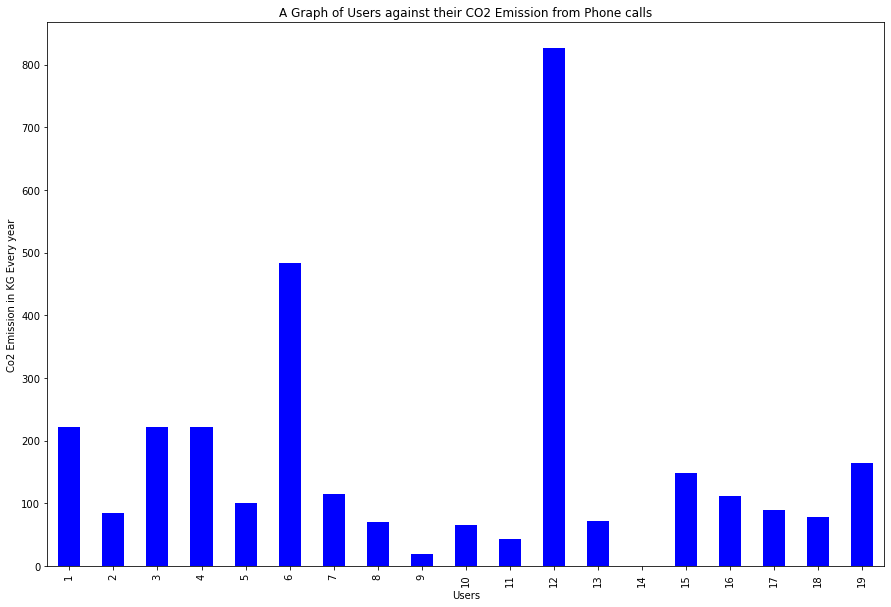

In [482]:
myplot = co2bycall_per_user.plot(figsize=(15, 10), kind='bar', rot=90, color = "blue", title = "A Graph of Users against their CO2 Emission from Phone calls")
#myplot.figure(figsize=(3, 3))
myplot.set_xlabel("Users")
myplot.set_ylabel("Co2 Emission in KG Every year")
plt.savefig('user-wise emission from calling.jpg')

In [483]:
co2bycall_per_user.describe()

count     19.000000
mean     165.210842
std      192.595845
min        0.416000
25%       71.463600
50%       99.954400
75%      193.328200
max      825.827600
Name: CALLS_duration, dtype: float64

In [490]:
co2bycall_per_user.mean()

165.21084210526314

In [18]:
call_made  = pd.read_csv(r'C:\Users\muhad\DAV\Level_2\call_made.csv')
call_made

,User,CALLS_duration,User ID
0,1,42747,1
1,2,16166,3
2,3,42747,9
3,4,42747,13
4,5,19222,14
5,6,92856,25
6,7,22159,32
7,8,13619,37
8,9,3788,47
9,10,12535,50


In [21]:
call_made['CALLS_duration'].describe()

count        19.000000
mean      31771.315789
std       37037.662413
min          80.000000
25%       13743.000000
50%       19222.000000
75%       37178.500000
max      158813.000000
Name: CALLS_duration, dtype: float64

# 1 Minute of call emits 0.06KG od CO2

In [25]:
call_made['CO2_Emission'] = (call_made['CALLS_duration']/60)*0.06

In [27]:
call_made.head()

,CALLS_duration,User ID,CO2_Emission
0,42747,1,42.747
1,16166,3,16.166
2,42747,9,42.747
3,42747,13,42.747
4,19222,14,19.222


In [32]:
print(call_made['CO2_Emission'].describe())

count     19.000000
mean      31.771316
std       37.037662
min        0.080000
25%       13.743000
50%       19.222000
75%       37.178500
max      158.813000
Name: CO2_Emission, dtype: float64


In [36]:
call_made['Cumulative CO2_Emission'] = call_made['CO2_Emission'].cumsum()

In [39]:
call_made['Cumulative Percentile of CO2'] = call_made['Cumulative CO2_Emission'] * 100/19

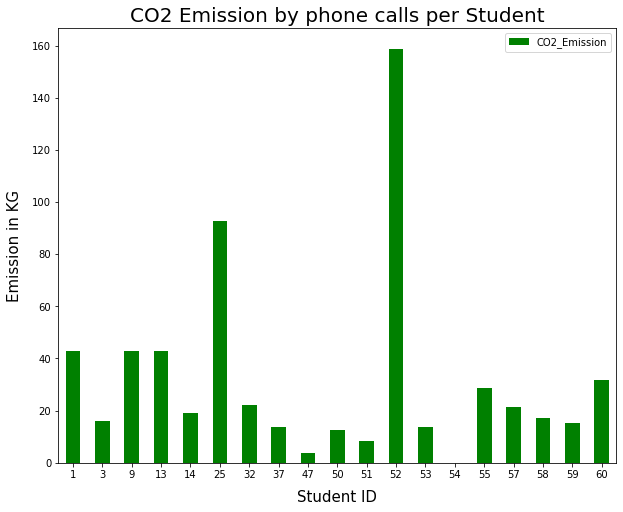

In [50]:
call_made.plot(kind='bar', x='User ID', y='CO2_Emission', 
        figsize=(10, 8), legend=True, color='green', rot=0);
plt.title("CO2 Emission by phone calls per Student", fontsize=20)
plt.xlabel("Student ID", labelpad=10, fontsize=15)
plt.ylabel("Emission in KG", labelpad=10, fontsize=15)
plt.show()


In [52]:
call_made

,CALLS_duration,User ID,CO2_Emission,Cumulative CO2_Emission,Cumulative Percentile of CO2
0,42747,1,42.747,42.747,224.984211
1,16166,3,16.166,58.913,310.068421
2,42747,9,42.747,101.660,535.052632
3,42747,13,42.747,144.407,760.036842
4,19222,14,19.222,163.629,861.205263
5,92856,25,92.856,256.485,1349.921053
6,22159,32,22.159,278.644,1466.547368
7,13619,37,13.619,292.263,1538.226316
8,3788,47,3.788,296.051,1558.163158
9,12535,50,12.535,308.586,1624.136842
